# Create the Decision Tree classifier and visualize by Plot

  In this notebook, we're going to go through an example machine learning project with the goal of Create a Decision Tree classifier and visualize it graphically.
  
  To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine   learning and modelling tasks.

## 1. Problem Defination

How well we classify the flower by the Decision Tree classifier.

## 2. Data


We will work on Iris dataset.
we downloded the iris data from "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view" and stored it at local drive path "../Iris.csv/".

In [1]:
# Import the data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import the data and store it to 'df' variable

df = pd.read_csv("Iris.csv")

In [3]:
# View first five rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Take some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## EDA(Exploratory Data Analysis)

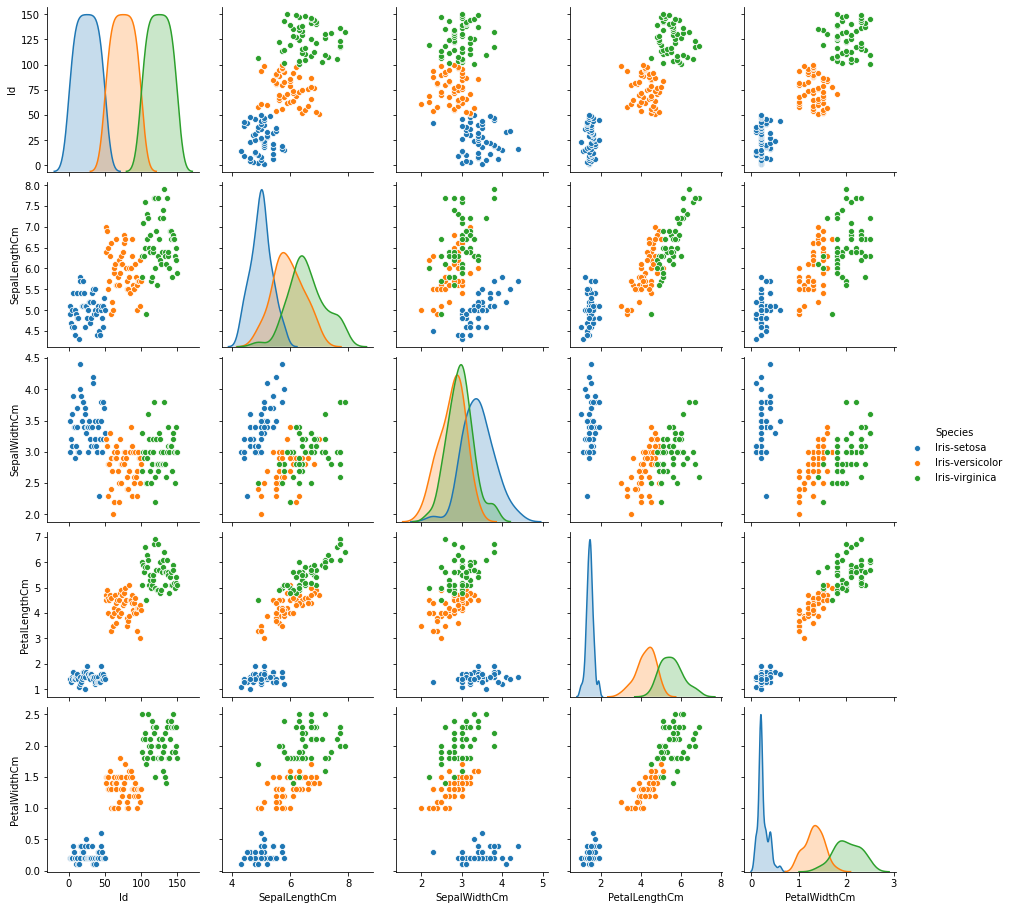

In [5]:
# Plot pairplot
sns.pairplot(data = df, hue='Species')

## Preparing the data for modelling

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on,in this case only one feature that is Hours, and a y array with the target variable, in this case the Scores column.

In [6]:
# Import the features from data set(drop the 'Target' value along the column)
X = df.drop('Species', axis =1).values

In [7]:
# Import the 'Target' variable
y = df['Species'].values

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Creating and Training the model

In [10]:
# Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtc = DecisionTreeClassifier()

In [12]:
# train the model on fatures and target variable
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [13]:
# Prediction on test set
pred = dtc.predict(X_test)

In [14]:
# Import evaluation matrix
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
# Print the value of precision, recall, f1-score
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [16]:
# Print the confusion matrix
print(confusion_matrix(y_test, pred))

[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]


## Visualize the Decision Tree

### 1. Visualize using matplotlib

In [17]:
# Import tree
from sklearn import tree

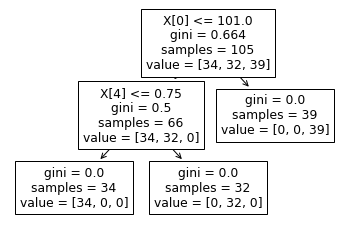

In [18]:
#Plot tree
tree.plot_tree(dtc);

In addition to adding the code to allow you to save your image, the code below tries to make the decision tree more interpretable by adding in feature and class names (as well as setting filled = True).

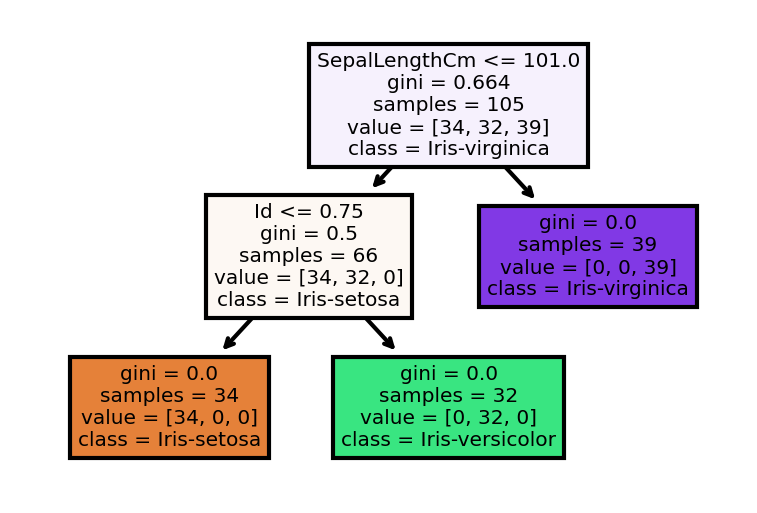

In [19]:
feat=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Id']
Class =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=300)
tree.plot_tree(dtc,
               feature_names = feat, 
               class_names=Class,
               filled = True);
fig.savefig('imagename.png')

### 2. Visualize using Graphviz

In [20]:
tree.export_graphviz(dtc,
                     out_file="tree.dot",
                     feature_names = feat, 
                     class_names= Class,
                     filled = True)

In [21]:
import pydot
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')


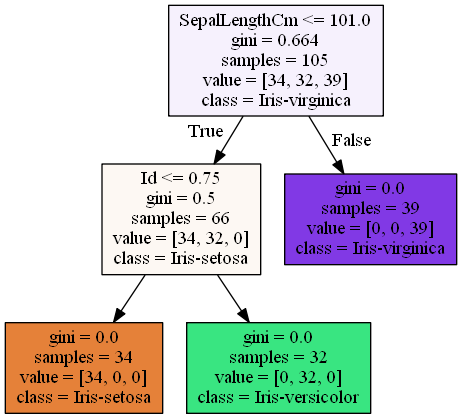

In [22]:
from IPython.display import display, Image
display(Image(filename='tree.png'))

# Thank You